Ticker: NL25_EUR
Durchschnittliche Zeit bis zum Event: 1.0
Median der Zeit bis zum Event: 1
Schnellster Fund: 607.07
Zeit bis zum Event: 1
Event beim schnellsten Fund: +2% erreicht



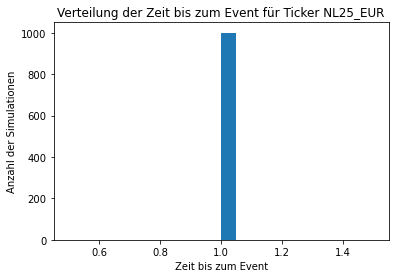

In [1]:
import random
import oandapyV20
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
from oandapyV20.endpoints.instruments import InstrumentsCandles

def get_historical_prices(instrument, count):
    access_token = "e11aadc917842adf254cd73c038c4e0a-321ea21ac5697ab46036807f5e5e943d"

    api = API(access_token=access_token, environment="practice")
    params = {
        "granularity": "H2",
        "count": count,
    }
    request = InstrumentsCandles(instrument=instrument, params=params)
    
    try:
        response = api.request(request)
        candles = response["candles"]
        prices = [float(candle["mid"]["c"]) for candle in candles]
        volumes = [int(candle["volume"]) for candle in candles]
        return prices, volumes
    except V20Error as e:
        print("Fehler beim Abrufen der historischen Preise:", e)
        return [], []

def monte_carlo_simulation(prices, volumes, target_growth, target_decline):
    num_simulations = 1000
    time_to_event = []
    
    fastest_fund = None
    fastest_time = float('inf')
    fastest_event = None
    
    for _ in range(num_simulations):
        simulated_returns = random.choices(prices, k=len(prices))
        simulated_volumes = random.choices(volumes, k=len(volumes))
        fund_value = 1.0
        time = 0
        
        while fund_value < 1 + target_growth and fund_value > 1 - target_decline:
            if time >= len(simulated_returns):
                break
            growth_factor = simulated_returns[time]
            volume_factor = simulated_volumes[time]
            fund_value *= growth_factor
            fund_value *= volume_factor
            time += 1
        
        time_to_event.append(time)
        
        if time < fastest_time:
            fastest_time = time
            fastest_fund = prices[0]  # Erster Wert der Preise verwenden
            if fund_value >= 1 + target_growth:
                fastest_event = "+2% erreicht"
            else:
                fastest_event = "-2% erreicht"
    
    return time_to_event, fastest_fund, fastest_time, fastest_event

# Tickers der Indexfonds
tickers = ['SPX500_USD', 'JP225_USD', 'DE30_EUR', 'AU200_AUD', 'CN50_USD', 'EU50_EUR', 'FR40_EUR', 'NL25_EUR']

# Monte-Carlo-Simulation durchführen
target_growth = 0.02  # 2% Wachstumsziel
target_decline = 0.02  # 2% Rückgangsziel
count = 5000  # Anzahl der zurückliegenden Werte

for ticker in tickers:
    prices, volumes = get_historical_prices(ticker, count)
    
    if len(prices) == 0 or len(volumes) == 0:
        print("Fehler beim Abrufen der historischen Preise für Ticker:", ticker)
        continue
    
    time_to_event, fastest_fund, fastest_time, fastest_event = monte_carlo_simulation(prices, volumes, target_growth, target_decline)
    
import matplotlib.pyplot as plt

# ...

# Ergebnisse anzeigen
print("Ticker:", ticker)
print("Durchschnittliche Zeit bis zum Event:", sum(time_to_event) / len(time_to_event))
print("Median der Zeit bis zum Event:", sorted(time_to_event)[len(time_to_event) // 2])
print("Schnellster Fund:", fastest_fund)
print("Zeit bis zum Event:", fastest_time)
print("Event beim schnellsten Fund:", fastest_event)
print()

# Verteilung der Zeit bis zum Event grafisch darstellen
plt.hist(time_to_event, bins=20)
plt.xlabel("Zeit bis zum Event")
plt.ylabel("Anzahl der Simulationen")
plt.title("Verteilung der Zeit bis zum Event für Ticker " + ticker)
plt.show()


